In [2]:
%run C:/Users/HSS/dd.py

### 
- 1. iris 데이터를 읽으세요
- 2. 컬럼별 boxplot을 그려보세요
- 3. StandardScaler를 적용헤 보세요
- 4. 훈련 / 테스트를 나눠주세요
- 5. 모델이 정해지고, train을 라벨과 함께 받아 학습하고, test를 받아 predict를 반환하는 함수를 만들어 주세요
- 6. predict 결과를 받아 accuracy 를 계산하는 함수를 만들어주세요
- 7. LGBM
- 8. RandomForest
- 9. DecisionTree
- 10. LogisticRegression
- 11. 7번부터 10번가지의 test accuracy를 df로 정리하세요


### - 1. iris 데이터를 읽으세요

In [54]:
from sklearn.datasets import load_iris

X = load_iris().data
y = load_iris().target

iris = pd.DataFrame(X)
iris.columns = load_iris().feature_names
iris['species'] = y
iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [21]:
iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


### - 2. 컬럼별 boxplot을 그려보세요

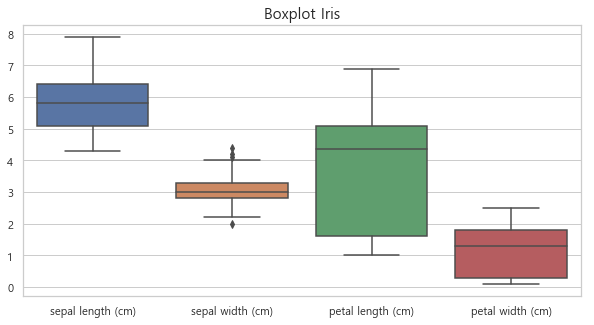

In [39]:
plt.figure(figsize = (10,5))
plt.title('Boxplot Iris', fontsize = 15)
sns.boxplot(data = iris[iris.columns[:-1]])
plt.show()

### - 3. StandardScaler를 적용헤 보세요


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

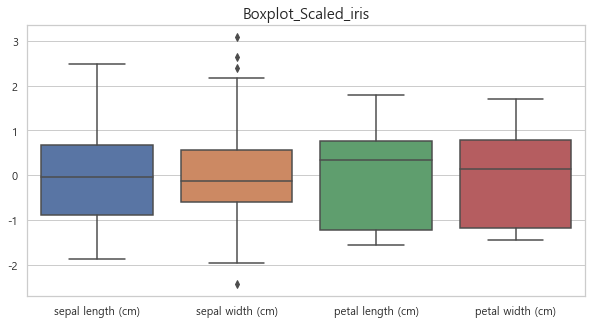

In [52]:
plt.figure(figsize = (10,5))
plt.title('Boxplot_Scaled_iris', fontsize  = 15)

scaled_X = pd.DataFrame(scaled_X)
scaled_X.columns = load_iris().feature_names

sns.boxplot(data = scaled_X)
plt.show()

### - 4. 훈련 / 테스트를 나눠주세요


In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13, stratify = y)

### - 5. 모델이 정해지고, train을 라벨과 함께 받아 학습하고, test를 받아 predict를 반환하는 함수를 만들어 주세요


In [155]:
def get_predict(model,X_train, X_test, y_train):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return preds

### - 6. predict 결과를 받아 accuracy 를 계산하는 함수를 만들어주세요


In [156]:
from sklearn.metrics import accuracy_score

def get_accuracy(y_test, pred):
    return accuracy_score(y_test,pred)

- 7. LGBM


In [157]:
from lightgbm  import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

lgbm = LGBMClassifier(n_estimators = 1000, num_leaves = 64, n_jobs = -1, boost_from_average = False)
RF = RandomForestClassifier(random_state = 13, n_estimators= 100, n_jobs = -1)
df = DecisionTreeClassifier(random_state = 13, max_depth = 4)
lr = LogisticRegression(random_state = 13, solver = 'liblinear')

In [158]:
lgbm_preds = get_predict(lgbm, X_train, X_test, y_train)
lgbm_accruacy = get_accuracy(y_test, lgbm_preds)

In [159]:
models = [lgbm, RF, df, lr]
model_names = ['LGBM', 'RandomForest','DecisionTree','LogisticRegression']

    

In [160]:
pd.DataFrame(model_names)

,0
0,LGBM
1,RandomForest
2,DecisionTree
3,LogisticRegression


In [161]:
def get_result_pd(models, modelnames, X_train, X_test, y_train, y_test):
    
    table = pd.DataFrame()
    blank_list = []
    
    for model in models:   
        preds = get_predict(model, X_train, X_test, y_train)
        accuracy = get_accuracy(y_test, preds)
        blank_list.append(accuracy)
    
    table['model'] = modelnames
    table['accuracy'] = blank_list
    
    return table
    

In [162]:
get_result_pd(models, model_names, X_train, X_test, y_train, y_test)

,model,accuracy
0,LGBM,0.977778
1,RandomForest,0.977778
2,DecisionTree,0.977778
3,LogisticRegression,0.977778


In [163]:
df.fit(X_train, y_train)
df.predict(X_test)

array([1, 1, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 2, 1, 2, 0, 0, 2, 1, 1, 0, 2,
       0, 0, 0, 0, 0, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 0,
       2])

### 파이프라인

In [77]:
from sklearn.pipeline import Pipeline

estimators = [
    ('scaler', StandardScaler()),
    ('clf',DecisionTreeClassifier())
]

In [78]:
pipe = Pipeline(estimators)
pipe.steps

[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'))]

In [82]:
pipe.set_params(clf__max_depth = 2)
pipe.set_params(clf__random_state = 13)

X_scaled = pipe['scaler'].fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 13)

In [88]:
len(X_train), len(y_train)

(105, 105)

In [91]:
pipe.fit(X_train, y_train)
pipe.predict(X_test)

array([1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 1, 0,
       0, 2, 1, 2, 0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 1, 1, 2,
       2])

### 하이퍼 파라미터 튜닝

In [187]:
## k-fold

from sklearn.model_selection import KFold


# X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.3, random_state = 13)


skfold = StratifiedKFold(n_splits = 5)
df = DecisionTreeClassifier(max_depth = 2, random_state =13)

accuracy = []

for train_idx, test_idx in skfold.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    df.fit(X_train, y_train)
    preds = df.predict(X_test)
    accuracy.append(accuracy_score(y_test, preds))

accuracy

[0.9333333333333333, 0.9666666666666667, 0.9, 0.8666666666666667, 1.0]

In [184]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [185]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [186]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits = 5)
tree_cv = DecisionTreeClassifier(max_depth = 2, random_state =13)

accuracy = []

for train_idx, test_idx in skfold.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    tree_cv.fit(X_train, y_train)
    preds = tree_cv.predict(X_test)
    accuracy.append(accuracy_score(y_test, preds))

accuracy


[0.9333333333333333, 0.9666666666666667, 0.9, 0.8666666666666667, 1.0]

### 간단히..

In [191]:
cross_val_score(tree_cv, X, y, scoring = None, cv = skfold)

array([0.93333333, 0.96666667, 0.9       , 0.86666667, 1.        ])

In [192]:
## train score와 함께 보려면
from sklearn.model_selection import cross_validate

cross_validate(tree_cv, X, y, scoring = None, cv = skfold, return_train_score = True)

{'fit_time': array([0.00299764, 0.00199795, 0.00199914, 0.00299764, 0.00199914]),
 'score_time': array([0.00199771, 0.00100017, 0.0009985 , 0.00099921, 0.00100255]),
 'test_score': array([0.93333333, 0.96666667, 0.9       , 0.86666667, 1.        ]),
 'train_score': array([0.95833333, 0.95833333, 0.975     , 0.96666667, 0.95      ])}

### 하이퍼파라미터 튜닝
- `GridSearchCV`

In [195]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth' : [2,4,7,10]}
iris_tree = DecisionTreeClassifier(max_depth = 2, random_state = 13)
# iris_tree.fit(X_train, y_train)
# preds = iris_tree.predict(X_test)

gridsearch =  GridSearchCV(estimator = iris_tree, param_grid = params, cv = 5)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=2,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=13,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 4, 7, 10]}, pre_dispatch='2*n_jobs',
    

In [196]:
import pprint

pp = pprint.PrettyPrinter(indent = 4)
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.0023993 , 0.0013998 , 0.00199523, 0.00159903]),
    'mean_score_time': array([0.00079889, 0.00100389, 0.00099988, 0.00079923]),
    'mean_test_score': array([0.91666667, 0.95833333, 0.95833333, 0.95833333]),
    'param_max_depth': masked_array(data=[2, 4, 7, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 4},
                  {'max_depth': 7},
                  {'max_depth': 10}],
    'rank_test_score': array([4, 1, 1, 1]),
    'split0_test_score': array([0.91666667, 0.95833333, 0.95833333, 0.95833333]),
    'split1_test_score': array([1., 1., 1., 1.]),
    'split2_test_score': array([0.91666667, 0.91666667, 0.91666667, 0.91666667]),
    'split3_test_score': array([0.91666667, 0.91666667, 0.91666667, 0.91666667]),
    'split4_test_score': array([0.83333333, 1.        , 1.        , 1.        ]),
    'std_fit_time': array([0.0010212 , 0

In [197]:
# 가장 최적의 모델은?
gridsearch.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=13, splitter='best')

In [198]:
#점수는?
gridsearch.best_score_

0.9583333333333333

In [199]:
#파라미터는?
gridsearch.best_params_

{'max_depth': 4}

### pipeline에 Gridsearch를 적용하려면

In [200]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler


estimators = [
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier(random_state = 13))
]

pipe = Pipeline(estimators)


In [202]:
param_grid = [{'clf__max_depth': [2, 4, 7, 10]}]

GridSearch = GridSearchCV(estimator = pipe, param_grid= param_grid, cv = 5)
GridSearch.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                     

In [203]:
score_df = pd.DataFrame(GridSearch.cv_results_)
score_df[['params','rank_test_score','mean_test_score','std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
0,{'clf__max_depth': 2},4,0.933333,0.047140
1,{'clf__max_depth': 4},1,0.966667,0.036515
2,{'clf__max_depth': 7},1,0.966667,0.036515
3,{'clf__max_depth': 10},1,0.966667,0.036515
